In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from twython import Twython
import re
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [3]:
def get_tweet(q):
    app_key = 'bdKaYkyCcSmf9f6Wfqj8VvIuR'
    app_secret = '1S1WMaZJxdIFyiniKjDeLFCBDRPP72bx2HCxI2cwMTx0Y7bYOy'
    oauth_token = '786603866498269184-DSnfKXCZhYNRUjboLDwHWaZ7InaFslf'
    oauth_token_secret = 'QDRQK2huoL8hpo3MvaqrNdrGtvWWxCd6sCCI8B0X95v8y'
    try:
        t = Twython(app_key=app_key, app_secret=app_secret, oauth_token=oauth_token, oauth_token_secret=oauth_token_secret)
        search =t.search(q=q,count=200)
        fetched_tweets = search['statuses']
        text=[]
        for i in fetched_tweets:
            text.append(i.get('text'))
        sentiment=[]
        for tweet in text:
            sentiment.append(get_tweet_sentiment(tweet))
       

    except:
        print("error")
    ptweets = [tweet for tweet in sentiment if tweet == 'positive']
    ntweets = [tweet for tweet in sentiment if tweet == 'negative']
    positive_tweet=int(100*len(ptweets)/len(sentiment))
    negative_tweets=int(100*len(ntweets)/len(sentiment))
    neutral_tweets=int(100*(len(sentiment) - len(ntweets) - len(ptweets))/len(sentiment))
    return text,sentiment,positive_tweet,negative_tweets,neutral_tweets


In [4]:
text_bjp,sentiment_bjp,x1,y1,z1=get_tweet('bjp')
text_congress,sentiment_congress,x2,wy2,z2=get_tweet('congress')
text_aap,sentiment_aap,x3,y3,z3=get_tweet('aap')

In [5]:
df_bjp=pd.DataFrame()
df_bjp['text']=text_bjp
df_bjp['sentiment']=sentiment_bjp
%matplotlib inline
df_bjp

,text,sentiment
0,RT @NarennTandon: जब लाम्बा AAP मे थी तो छुपार...,neutral
1,@SaakreKarthik @UmeshJadhav_BJP @drashwathcn M...,neutral
2,RT @Pratima64667922: @Anchorpriyanka_ @eManage...,neutral
3,@gdagzb @Mayor_Ghaziabad @DineshMunicipal @Ssp...,neutral
4,1-400 कोटी केंद्राला परत देणे\n2-स्वहितासाठी क...,neutral
5,@ManishT48976083 BJP ki Kala Shrek Kanoon ke v...,neutral
6,RT @thatsTamil: பாஜகவில் இணைந்தார் வி.பி.துரைச...,neutral
7,@BJP_Ramanuj @NitishKumar @SushilModi सरकार सि...,neutral
8,RT @INCNGoa: BJP has always prioritised the pr...,neutral
9,RT @rohini_sgh: वोकल फ़ॉर लोकल का यही शक्ल होग...,neutral


In [6]:
df_congress=pd.DataFrame()
df_congress['text']=text_congress
df_congress['sentiment']=sentiment_congress
%matplotlib inline
df_congress

,text,sentiment
0,RT @IamErSPSingh: Carryminati Roasts 🔥🔥 Tik To...,neutral
1,RT @rishibagree: Congress is a funny party ;\n...,negative
2,RT @rishibagree: Congress is a funny party ;\n...,negative
3,RT @AskAnshul: - UP govt sent 560 buses to bri...,positive
4,"RT @DavidJollyFL: ""It should anger every Ameri...",negative
5,RT @AskAnshul: - UP govt sent 560 buses to bri...,positive
6,"RT @Freedom4Horses: In less than 50 days, BLM ...",negative
7,RT @knowthenation: Congress v/s Congress\n\n#P...,neutral
8,RT @puerto_duc: Als comuns no els hi agrada Gr...,neutral
9,RT @netaji3210: Rajdeep Sardesai is loyal majd...,positive


In [7]:
df_aap=pd.DataFrame()
df_aap['text']=text_aap
df_aap['sentiment']=sentiment_aap
%matplotlib inline
df_aap

,text,sentiment
0,RT @NarennTandon: जब लाम्बा AAP मे थी तो छुपार...,neutral
1,RT @RealKingbhau: Thank you everyone for suppo...,positive
2,RT @MamataOfficial: Cyclone #Amphan has left a...,neutral
3,@maliniawasthi bhagwaan unki aatma ko shanti d...,neutral
4,"RT @Advaidism: To all Malayalis,\n\nBengalis w...",neutral
5,@shankar_1999 @surajs_01 Okk okk 😌😌 par paise ...,neutral
6,@kddesirock KD sir ek sawal puchna chahta hun ...,neutral
7,@_Blissfulgirl_ @_ziddi_ @imrlsahiL_ @__Alisha...,neutral
8,RT @prafullaketkar: . @RSSorg Swayamsevak ensu...,positive
9,@myogioffice sir ji meri train Kalyan se 20th ...,neutral


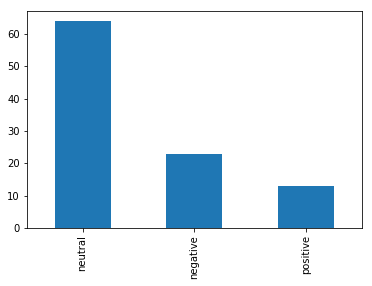

In [8]:
df_bjp['sentiment'].value_counts().plot(kind='bar')

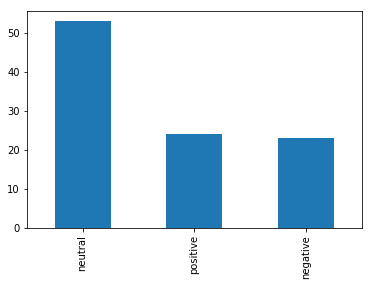

In [9]:
df_congress['sentiment'].value_counts().plot(kind='bar')

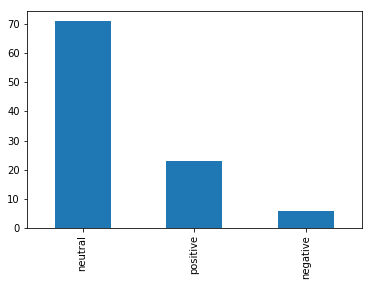

In [10]:
df_aap['sentiment'].value_counts().plot(kind='bar')

In [11]:
df_bjp.isnull().sum()

text         0
sentiment    0
dtype: int64

In [12]:
df_congress.isnull().sum()

text         0
sentiment    0
dtype: int64

In [13]:
df_aap.isnull().sum()

text         0
sentiment    0
dtype: int64

## 2 : Positive, 1 : Negative ,0 : Neutral

In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_bjp['sentiment']=lb.fit_transform(df_bjp['sentiment'])
df_bjp['Party'] = 'Bjp'
df_bjp

,text,sentiment,Party
0,RT @NarennTandon: जब लाम्बा AAP मे थी तो छुपार...,1,Bjp
1,@SaakreKarthik @UmeshJadhav_BJP @drashwathcn M...,1,Bjp
2,RT @Pratima64667922: @Anchorpriyanka_ @eManage...,1,Bjp
3,@gdagzb @Mayor_Ghaziabad @DineshMunicipal @Ssp...,1,Bjp
4,1-400 कोटी केंद्राला परत देणे\n2-स्वहितासाठी क...,1,Bjp
5,@ManishT48976083 BJP ki Kala Shrek Kanoon ke v...,1,Bjp
6,RT @thatsTamil: பாஜகவில் இணைந்தார் வி.பி.துரைச...,1,Bjp
7,@BJP_Ramanuj @NitishKumar @SushilModi सरकार सि...,1,Bjp
8,RT @INCNGoa: BJP has always prioritised the pr...,1,Bjp
9,RT @rohini_sgh: वोकल फ़ॉर लोकल का यही शक्ल होग...,1,Bjp


In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_congress['sentiment']=lb.fit_transform(df_congress['sentiment'])
df_congress['Party'] = 'congress'
df_congress

,text,sentiment,Party
0,RT @IamErSPSingh: Carryminati Roasts 🔥🔥 Tik To...,1,congress
1,RT @rishibagree: Congress is a funny party ;\n...,0,congress
2,RT @rishibagree: Congress is a funny party ;\n...,0,congress
3,RT @AskAnshul: - UP govt sent 560 buses to bri...,2,congress
4,"RT @DavidJollyFL: ""It should anger every Ameri...",0,congress
5,RT @AskAnshul: - UP govt sent 560 buses to bri...,2,congress
6,"RT @Freedom4Horses: In less than 50 days, BLM ...",0,congress
7,RT @knowthenation: Congress v/s Congress\n\n#P...,1,congress
8,RT @puerto_duc: Als comuns no els hi agrada Gr...,1,congress
9,RT @netaji3210: Rajdeep Sardesai is loyal majd...,2,congress


In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_aap['sentiment']=lb.fit_transform(df_aap['sentiment'])
df_aap['Party'] = 'Aap'
df_aap

,text,sentiment,Party
0,RT @NarennTandon: जब लाम्बा AAP मे थी तो छुपार...,1,Aap
1,RT @RealKingbhau: Thank you everyone for suppo...,2,Aap
2,RT @MamataOfficial: Cyclone #Amphan has left a...,1,Aap
3,@maliniawasthi bhagwaan unki aatma ko shanti d...,1,Aap
4,"RT @Advaidism: To all Malayalis,\n\nBengalis w...",1,Aap
5,@shankar_1999 @surajs_01 Okk okk 😌😌 par paise ...,1,Aap
6,@kddesirock KD sir ek sawal puchna chahta hun ...,1,Aap
7,@_Blissfulgirl_ @_ziddi_ @imrlsahiL_ @__Alisha...,1,Aap
8,RT @prafullaketkar: . @RSSorg Swayamsevak ensu...,2,Aap
9,@myogioffice sir ji meri train Kalyan se 20th ...,1,Aap


## ELECTION PREDICTION BASED ON THE ANALYSIS

### Concatenating all three party's tweets

In [17]:
df1 = pd.concat([df_bjp,df_congress,df_aap])

In [18]:
df1

,text,sentiment,Party
0,RT @NarennTandon: जब लाम्बा AAP मे थी तो छुपार...,1,Bjp
1,@SaakreKarthik @UmeshJadhav_BJP @drashwathcn M...,1,Bjp
2,RT @Pratima64667922: @Anchorpriyanka_ @eManage...,1,Bjp
3,@gdagzb @Mayor_Ghaziabad @DineshMunicipal @Ssp...,1,Bjp
4,1-400 कोटी केंद्राला परत देणे\n2-स्वहितासाठी क...,1,Bjp
5,@ManishT48976083 BJP ki Kala Shrek Kanoon ke v...,1,Bjp
6,RT @thatsTamil: பாஜகவில் இணைந்தார் வி.பி.துரைச...,1,Bjp
7,@BJP_Ramanuj @NitishKumar @SushilModi सरकार सि...,1,Bjp
8,RT @INCNGoa: BJP has always prioritised the pr...,1,Bjp
9,RT @rohini_sgh: वोकल फ़ॉर लोकल का यही शक्ल होग...,1,Bjp


In [19]:
df1['Party'].value_counts()

Bjp         100
congress    100
Aap         100
Name: Party, dtype: int64

In [20]:
df1['sentiment'].value_counts()

1    188
2     60
0     52
Name: sentiment, dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

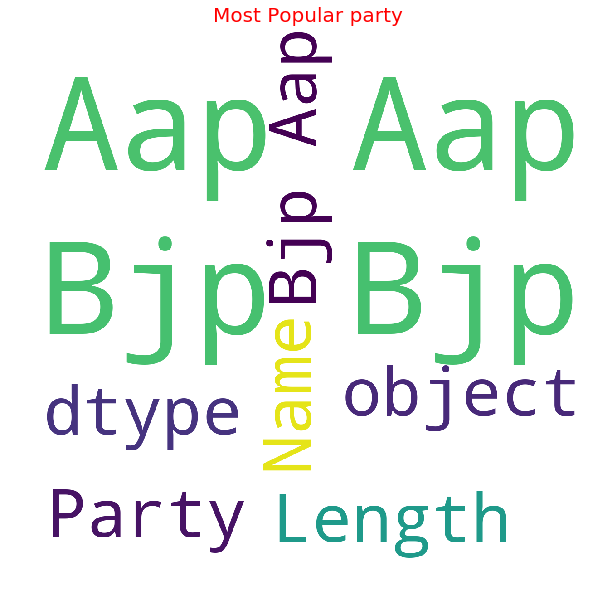

pandas.core.series.Series

In [22]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df1['Party']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular party ',fontsize = 20,color = 'red')
plt.show()
type(df1['Party'])

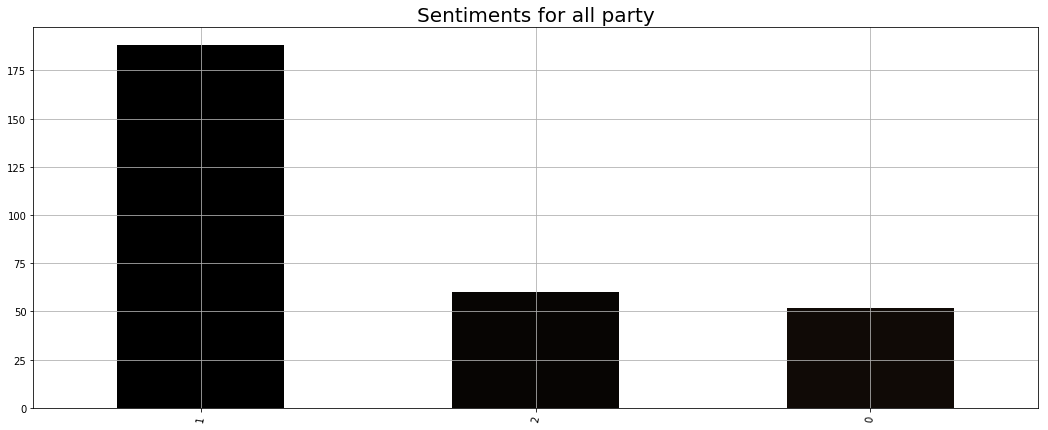

In [23]:
# visualization by frequency table
plt.rcParams['figure.figsize'] = (18,7)
color = plt.cm.copper(np.linspace(0, 1, 40)) #Returns number spaces evenly w.r.t interval. Similar to arange but instead of step it uses sample number.
df1['sentiment'].value_counts().head(40).plot.bar(color = color)
plt.title('Sentiments for all party', fontsize = 20)
plt.xticks(rotation = 80 )
plt.grid()
plt.show()

# Comparison of all the party's sentiments given by the public

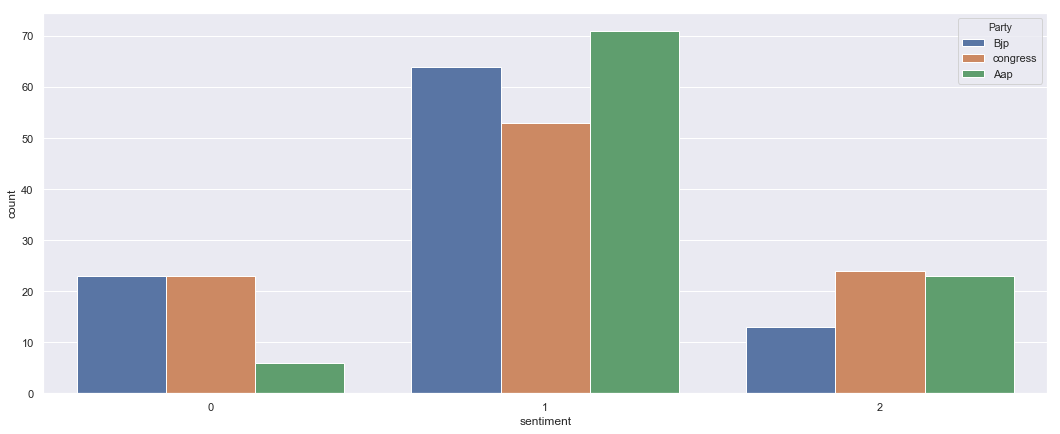

In [24]:
import seaborn as sns
sns.set(style="darkgrid",color_codes = "g")
sns.countplot(x="sentiment",hue = 'Party', data=df1)

## Visualization for BJP

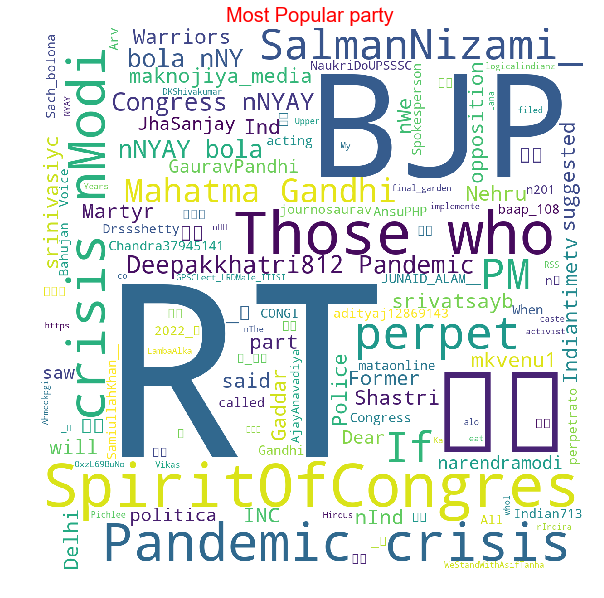

pandas.core.series.Series

In [33]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df_bjp['text']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular party ',fontsize = 20,color = 'red')
plt.show()
type(df_bjp['text'])

## Visualization for Congress

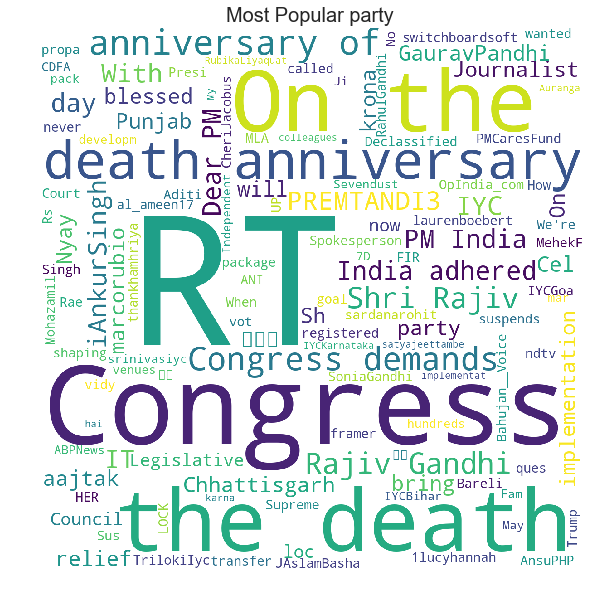

pandas.core.series.Series

In [34]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df_congress['text']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular party ',fontsize = 20)
plt.show()
type(df_congress['text'])

## Visualization for AAP

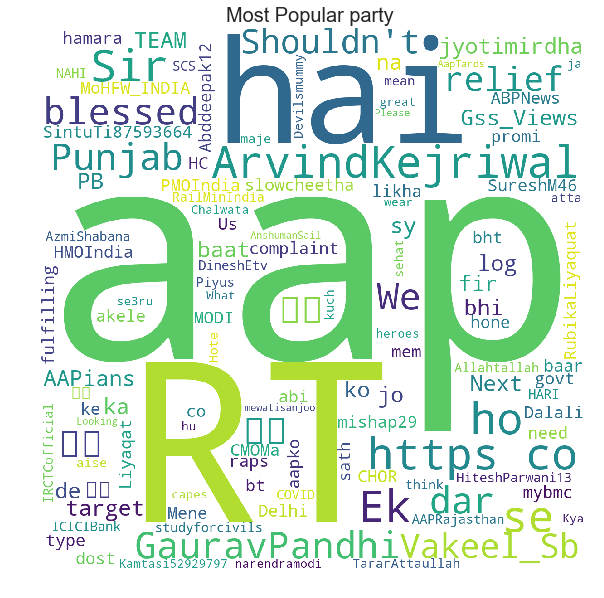

pandas.core.series.Series

In [35]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df_aap['text']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular party ',fontsize = 20)
plt.show()
type(df_aap['text'])

In [36]:
import re
first_text_bjp=df_bjp.text[0]
text_re_bjp=re.sub("[^a-zA-Z]"," ",first_text_bjp) #changing characters with space
text_re_bjp=text_re_bjp.lower()
text_re_bjp

'rt  indiantimetv                                                                                                            imarunoday   ht '

In [37]:
import nltk
from nltk.corpus import stopwords
text_re_bjp=nltk.word_tokenize(text_re_bjp) #separate all words
text_re_bjp

['rt', 'indiantimetv', 'imarunoday', 'ht']

In [38]:
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
text_re_bjp=[lemma.lemmatize(i) for i in text_re_bjp]
text_re_bjp=" ".join(text_re_bjp)
text_re_bjp

'rt indiantimetv imarunoday ht'

In [39]:
# apply to all the dataset
import nltk as nlp
text_list=[]
for i in df_bjp.text:
    text_re_bjp=re.sub("[^a-zA-Z]"," ",i)
    text_re_bjp=text_re_bjp.lower()
    text_re_bjp=nltk.word_tokenize(text_re_bjp)
    lemma=nlp.WordNetLemmatizer()
    text_re_bjp=[lemma.lemmatize(word) for word in text_re_bjp]
    text_re_bjp=" ".join(text_re_bjp)
    text_list.append(text_re_bjp)
text_list[:10]


['rt indiantimetv imarunoday ht',
 'rt ansuphp when congress spokesperson called yogi adityanath a ajay visht rajdeep sardesai had no problem but when bjp spokesperson',
 'chandra baap junaid alam bjpsarojini aayodhya ke news de rha hu jha bjp wale mandir bnane ki bat http t co g qteakht',
 'rt maknojiya medium those who were the perpetrator of anti muslim riot have been let scott free because they have the blessing of the b',
 'rt mataonline jayantpatil ncp bjp coronainmaharashtra',
 'rt samiullahkhan delhi police is acting a the political arm of bjp it is shameful they are not even pretending to be fair every jus',
 'http t co p xoaopl',
 'rt salmannizami mahatma gandhi martyr indira gandhi martyr rajiv gandhi martyr name any martyr from bjp',
 'adityaj indian journosaurav arvindkejriwal msisodia indiatvnews p sahibsingh kapilmishra ind http t co dqjhaayita',
 'rt drssshetty salmannizami all congi s became political leader and dynasty pidi s all nationalist like bjp amp r became true

# CountVectorizer and Support Vector Classifier

In [40]:
#bag of words
# COUNT VECTORIZER
from sklearn.feature_extraction.text import CountVectorizer
max_features=100
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparse_matrix= cou_vec.fit_transform(text_list).toarray()


In [41]:
Y = df_bjp.iloc[:,1].values
X = sparse_matrix
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [42]:
Y

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1])

In [43]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
X.shape

(100, 100)

In [45]:
Y.shape

(100,)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 100)
(20, 100)
(80,)
(20,)


In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## NAIVE BAYES

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred_NB = classifier.predict(X_test)
NB = accuracy_score(y_pred_NB,Y_test)
print('\nNaiveBayes accuracy :-',accuracy_score(Y_test,y_pred_NB))


NaiveBayes accuracy :- 0.35


## SUPPORT VECTOR CLASSIFIER

In [49]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_pred_SVM = clf.predict(X_test)
svm = accuracy_score(y_pred_SVM,Y_test)
print("\nSVM classifier:-",accuracy_score(Y_test,y_pred_SVM))


SVM classifier:- 0.9
